In [46]:
import sys
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
import tensorboard

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the root directory
root_directory = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the system path
sys.path.append(root_directory)

# Verify the path addition
from helper_utils import *
from U_Net import *
import U_Net_helper_functions
from TIF_dataset import *
from pytorch_lightning.loggers import TensorBoardLogger

In [43]:
image_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\imgs")
label_folder_paths = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\labels")

image_paths =  list_files_in_folder(image_folder_paths)
label_paths =  list_files_in_folder(label_folder_paths)

In [41]:
# class TIF_dataset(Dataset):

#     def __init__(self, path_list_data, path_list_label, transform=None):
#         """

#         All of our data is in the same format. I sugest using the silver truths as they are in the format ideal for training.
#         I dont understand how the golden truths are suposed to work, we need to look into that. (especialy in the file PhC-C2DH-U373)

#         Arguments:
#             path_list_data: list of paths to tif files that will be datapoints
#             path_list_label: list of paths to tif files that will be labels
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.

#         Returns : a pair of tensors of shape (1, W, H), coresponding to data and label
#         """
#         self.path_list_data = path_list_data
#         self.path_list_label = path_list_label
#         self.transform = transform

#     def __len__(self):
#         return len(self.path_list_data)

#     def __getitem__(self, idx):
#         image = Image.open(self.path_list_data[idx])
#         image_np = np.array(image).astype('float32')
#         label = Image.open(self.path_list_label[idx])
#         label_np = np.array(label).astype('float32')
#         label_np = np.where(label_np != 0, 1, label_np)

#         image_tensor = torch.from_numpy(image_np).unsqueeze(0)
#         label_tensor = torch.from_numpy(label_np).unsqueeze(0)

#         image_tensor = image_tensor.float() / np.mean(image_np) #normalizing the image tensor
#         label_tensor = label_tensor.float()


#         if self.transform:
#             image_tensor = self.transform(image_tensor)
#             label_tensor = self.transform(label_tensor)

#         return image_tensor, label_tensor

In [47]:
dataset = TIF_dataset(image_paths, label_paths)

In [48]:
dataset[0]

TypeError: can't convert np.ndarray of type numpy.uint16. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [39]:
#train with pytorch lightning

sizes = [1, 8, 16, 32, 64, 128]
train_dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

logger = TensorBoardLogger("logs", name="U_Net")

lightning_model = UNet(sizes)

# trainer = pl.Trainer(max_epochs=3, logger=logger)
trainer = pl.Trainer(max_epochs=3)

trainer.fit(model = lightning_model, train_dataloaders=train_dataloader)

# %load_ext tensorboard
# %tensorboard --logdir logs

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                | Params
-----------------------------------------------------
0 | bottom_path  | ModuleList          | 493 K 
1 | top_path     | ModuleList          | 197 K 
2 | UpConvs      | ModuleList          | 87.5 K
3 | pool         | MaxPool2d           | 0     
4 | bottom_block | Convolutional_Block | 443 K 
5 | loss_fn      | CrossEntropyLoss    | 0     
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.885     Total estimated model params size (MB)
c:\Users\Komputer\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasin

Epoch 2: 100%|██████████| 46/46 [00:14<00:00,  3.21it/s, v_num=10]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 46/46 [00:14<00:00,  3.16it/s, v_num=10]


Model output


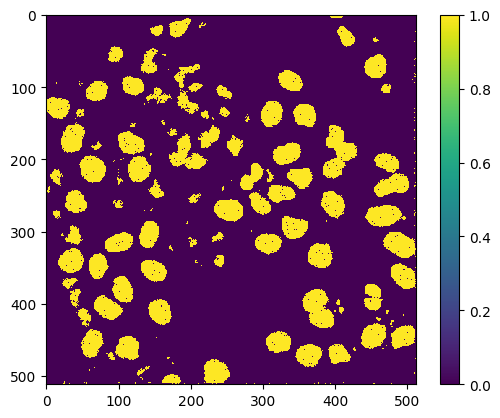

Label


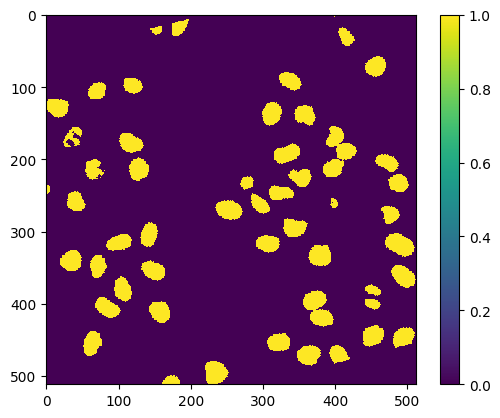

original image


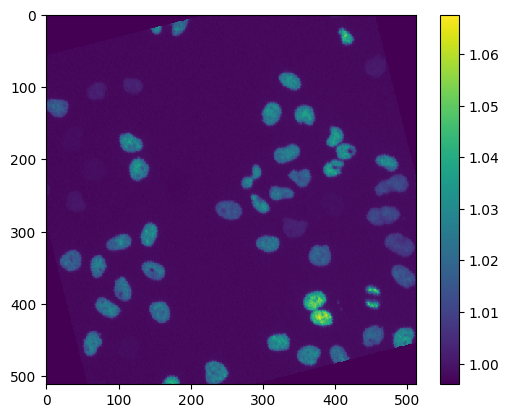

In [40]:
data, label = dataset[13]


output = lightning_model(data.unsqueeze(dim = 0))
model_return_numpy = channel_comparison(output)
print('Model output')
plot_heatmap(model_return_numpy)
print('Label')
plot_heatmap(label.squeeze().numpy())
print('original image')
plot_heatmap(data.squeeze().numpy())